# Dull Razor

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [60]:
src = plt.imread(r'F:\TUhh\Sem 5\Project\practice\train1.jpg')
src=cv2.resize(src,(500,500))
print( src.shape )


(500, 500, 3)


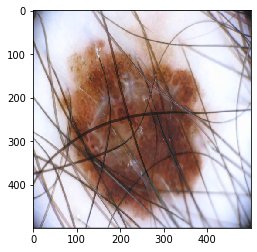

In [61]:
plt.imshow(src )
plt.show()

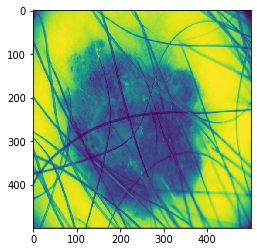

In [62]:
# Convert the original image to grayscale
grayScale = cv2.cvtColor( src, cv2.COLOR_RGB2GRAY )
plt.imshow(grayScale)
plt.show()
#cv2.imwrite('grayScale_sample1.jpg', grayScale, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

In [63]:
# Kernel for the morphological filtering
kernel = cv2.getStructuringElement(1,(17,17))

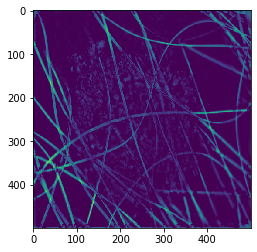

In [64]:
blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackhat)
plt.show()
#cv2.imwrite('blackhat_sample1.jpg', blackhat, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

In [65]:
print(blackhat)

[[ 0  0  0 ...  0  0  0]
 [ 9 59 53 ... 57 53  1]
 [ 6 38 43 ... 55 52  1]
 ...
 [46 47 42 ... 49 58  9]
 [42 69 60 ... 57 57  5]
 [ 0  0  0 ...  0  0  0]]


(500, 500)


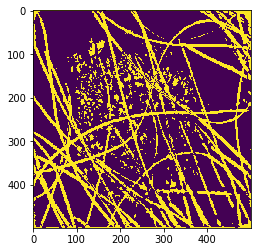

In [66]:
# intensify the hair countours in preparation for the inpainting 
# algorithm
ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
thresh3 = cv2.adaptiveThreshold(blackhat,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2) # Adaptive gaussian
thresh4 = cv2.adaptiveThreshold(blackhat,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2) # Adaptive gaussian
print( thresh2.shape )
plt.imshow(thresh2)
plt.show()
#cv2.imwrite('thresholded_sample1.jpg', thresh2, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

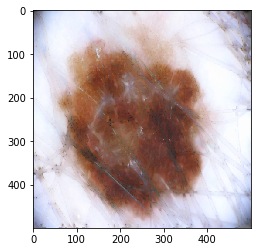

In [67]:
# inpaint the original image depending on the mask
dst = cv2.inpaint(src,thresh2,10,cv2.INPAINT_TELEA)
adMean = cv2.inpaint(src,thresh3,1,cv2.INPAINT_TELEA)
adGaus = cv2.inpaint(src,thresh4,3,cv2.INPAINT_TELEA)
plt.imshow(dst)
plt.show()
#cv2.imwrite('C:\\SkinHairRemovalPython\\InPainted_sample1.jpg', dst, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

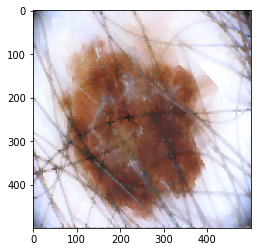

In [68]:
plt.imshow(adMean)
plt.show()

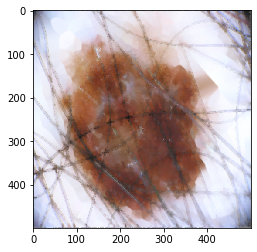

In [69]:
plt.imshow(adGaus)
plt.show()

# Bandaid Detection

# Circle detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

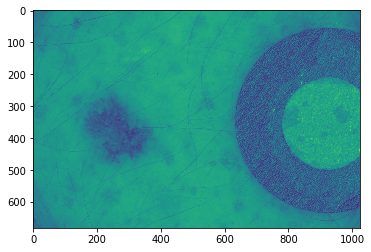

In [20]:
imPath=r'F:\TUhh\Sem 5\Project\practice\circ2.jpg'
im = cv2.imread(imPath)
gray =cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.show()

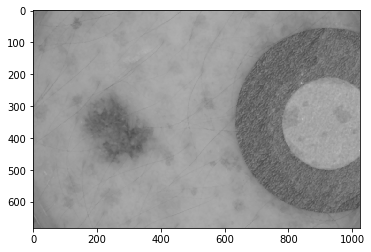

In [21]:
img = cv2.medianBlur(gray,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
plt.imshow(cimg)
plt.show()

In [22]:
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
param1=20,param2=50,minRadius=100,maxRadius=150)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv2.imshow('detected circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()